# Creating a custom database

By default, aqueous speciation calculations are performed along the vapor-liquid saturation pressure curve (PSAT). What if you want to perform a calculation at a higher pressure?

In this example, the thermodynamic database will be recalibrated with the `create_data0` function to allow calculations from 0 to 350 degrees C, all at 200 bars. This will actually create a new database (called a data0 file) with the desired temperature range and pressures. We can pick a three-letter code to designate this recalibrated data0 file; in this case we'll use 'cst', short for 'custom'.

Once the 'cst' data0 database is created, it can be used in a speciation calculation with the `speciate` function to speciate samples at 200 bars.

In [1]:
import AqEquil
ae = AqEquil.AqEquil()

In [2]:
# creating a new database called data0.cst from an OBIGT-style sheet
# from 0 to 350 degrees C and 200 bars.
ae.create_data0(
    filename = "wrm_data.csv",
    filename_ss = "solid_solutions.csv",
    grid_temps=[0.01, 50.0, 100.0, 150.0, 200.0, 250.0, 300.0, 350.0],
    grid_press=[200, 200, 200, 200, 200, 200, 200, 200], # 200 bars for each temperature value
    db = "cst",
    exceed_Ttr = True,
    template_name="sample_template_cst.csv")

Creating data0.cst...
Finished creating data0.cst.


In [3]:
# speciation calculation using the newly-created data0.cst database (200 bars)
speciation = ae.speciate(input_filename="input_example_cst.csv",
                         exclude=["Year", "Area"],
                         db='cst',
                         custom_db=True,
                         report_filename="report.csv",
                         delete_generated_folders=True)

Successfully created a data1.cst from data0.cst


Using cst to speciate Crater Hills Geyser
Using cst to speciate Gas Crack
Using cst to speciate Spray Geyser Source
Using cst to speciate Bison Pool
Using cst to speciate Snail
Using cst to speciate Ambergris
Using cst to speciate MLS Source
Finished!


In [4]:
speciation.report

Sample               Year     Area pH_(input) Temperature HCO3-_(input)  \
                                           pH        degC      Molality   
Bison Pool           2014      YNP      7.640        92.2      0.005690   
Spray Geyser Source  2012      YNP      8.021        92.9      0.005410   
Crater Hills Geyser  2012      YNP      3.327        89.0      0.000117   
Ambergris            2011  Iceland      8.452        81.5      0.000983   
MLS Source           2007      YNP      7.850        94.0      0.006785   
Gas Crack            2014     Oman     11.670        32.2      0.000033   
Snail                2014     Oman     11.650        23.8      0.000042   

Sample              O2_(input) HS-_(input) SiO2_(input) METHANE_(input)  \
                      Molality    Molality     Molality        Molality   
Bison Pool            0.000009    0.000003     0.006270    0.000000e+00   
Spray Geyser Source   0.000003    0.000004     0.005030    0.000000e+00   
Crater Hills Geyser   0.000000    0.000017     0.014400    0.000000e+00   
Ambergris             0.000053    0.000030     0.002480    8.900000e-09   
MLS Source            0.000007    0.000002     0.004200    0.000000e+00   
Gas Crack             0.000034    0.000006     0.000001    1.750000e-05   
Snail                 0.000009    0.000007     0.000010    1.371360e-04   

Sample                 H2_(input)  ...        CO(g)       CO2(g)        H2(g)  \
                         Molality  ... log_fugacity log_fugacity log_fugacity   
Bison Pool           0.000000e+00  ...    -36.61234     -1.64388    -31.35444   
Spray Geyser Source  0.000000e+00  ...    -36.68888     -2.03573    -31.03909   
Crater Hills Geyser  0.000000e+00  ...    -35.13290     -1.84820    -29.67121   
Ambergris            3.970000e-08  ...    -39.84702     -3.28776    -32.94634   
MLS Source           0.000000e+00  ...    -36.48004     -1.76671    -31.09933   
Gas Crack            2.261290e-04  ...    -53.56855    -10.42297    -39.56839   
Snail                2.471160e-04  ...    -54.35365    -10.16240    -40.62600   

Sample                    H2O(g)       H2S(g)        N2(g)       NH3(g)  \
                    log_fugacity log_fugacity log_fugacity log_fugacity   
Bison Pool              -0.12880     -5.17616          NaN          NaN   
Spray Geyser Source     -0.11636     -5.52502    -17.28175    -53.83761   
Crater Hills Geyser     -0.18671     -3.21990     -3.17076    -44.65763   
Ambergris               -0.32651     -5.01858    -19.71966    -57.70073   
MLS Source              -0.09706     -5.67463    -11.73675    -51.17569   
Gas Crack               -1.42698     -8.90690    -29.89733    -71.60746   
Snail                   -1.64333     -8.81064    -26.89099    -71.46664   

Sample                     O2(g)        S2(g)       SO2(g)  
                    log_fugacity log_fugacity log_fugacity  
Bison Pool               -1.9201    -20.73790    -43.79764  
Spray Geyser Source      -2.3966    -21.58422    -44.14221  
Crater Hills Geyser      -6.0000    -12.88646    -32.21682  
Ambergris                -1.1733    -21.21426    -46.59722  
MLS Source               -2.0353    -21.47894    -43.56499  
Gas Crack                -1.5180    -32.71251    -63.42110  
Snail                    -2.1764    -32.39777    -63.92087  

[7 rows x 248 columns]

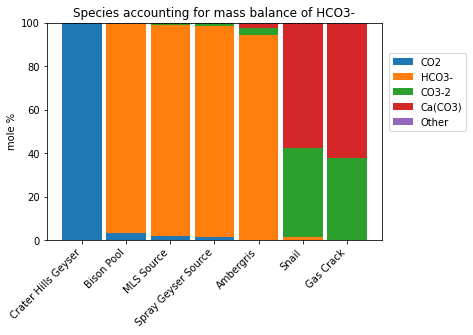

In [5]:
# visualize basis species contributions to aqueous species by mass.
speciation.plot_mass_contribution("HCO3-", sort_by='pH')